## Daten aufbereiten und Modell bauen für Möhrenfliegen

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot

## Daten aufbereiten

In [4]:

df = pd.read_excel('/Users/philipprutimann/Documents/Open Farming Hackdays/pest_monitoring/Möhrenfliegendaten2006_2023.xlsx')
df_new=df[["datum","Mittelwert","Median"]].copy()
df_new["week"]=[x.date().isocalendar().week for x in list(df_new.datum)]
df_new["year"]=[x.date().isocalendar().year for x in list(df_new.datum)]
df_new["key"]=[str(str(x) + str(y)) for x,y in zip(list(df_new["year"]),list(df_new["week"]))]
df_new.head()


,datum,Mittelwert,Median,week,year,key
0,2006-05-01,0.000000,0.0,18,2006,200618
1,2006-05-08,1.000000,0.0,19,2006,200619
2,2006-05-15,2.833333,4.0,20,2006,200620
3,2006-05-22,4.125000,3.5,21,2006,200621
4,2006-05-29,3.250000,3.5,22,2006,200622


In [50]:
#df_wetter = pd.read_csv('/Users/philipprutimann/Documents/Open Farming Hackdays/Temperatur_Niederschlag_Muri.csv',sep=";", encoding='latin1')
df_wetter = pd.read_excel('/Users/philipprutimann/Documents/Open Farming Hackdays/pest_monitoring/Temperatur_Niederschlag_Muri_Days.ods')
df_wetter["datum1"]=pd.to_datetime(df_wetter.Datum)
df_wetter["datetime"]=[x.date() for x in list(df_wetter.datum1)]
df_wetter["week"]=[x.date().isocalendar().week for x in list(df_wetter.datum1)]
df_wetter["year"]=[x.date().isocalendar().year for x in list(df_wetter.datum1)]
#df_wetter["temp"]=pd.to_numeric(df_wetter['MURI - Temperatur Durchschnitt +2 m (Â°C)'], errors='ignore')
df_wetter["temp"]=df_wetter['MURI - Temperatur Durchschnitt +2 m (Â°C)']
#df_wetter["rain"]=pd.to_numeric(df_wetter['MURI - Niederschlag (mm oder Liter/m2)'], errors='ignore')
df_wetter["rain"]=df_wetter['MURI - Niederschlag (mm oder Liter/m2)']
df_wetter["key"]=[str(x) + str(y) for x,y in zip(list(df_wetter["year"]),list(df_wetter["week"]))]
df_wetter=df_wetter[['key','temp','rain']]
#df_wetter=df_wetter[['key','MURI - Niederschlag (mm oder Liter/m2)']]
df_wetter.head()



,key,temp,rain
0,200330,19.5,0.0
1,200330,23.5,0.0
2,200330,21.2,10.6
3,200331,17.8,0.0
4,200331,18.5,0.0


In [13]:
df_wohlen = pd.read_excel('/Users/philipprutimann/Documents/Open Farming Hackdays/pest_monitoring/Wetterdaten_Wohlen.xlsx')
df_wohlen["datum1"]=pd.to_datetime(df_wohlen.Datum)
df_wohlen["datetime"]=[x.date() for x in list(df_wohlen.datum1)]
df_wohlen["week"]=[x.date().isocalendar().week for x in list(df_wohlen.datum1)]
df_wohlen["year"]=[x.date().isocalendar().year for x in list(df_wohlen.datum1)]
df_wohlen["tempmax_wohlen"]=df_wohlen['Tmax (°C)']
df_wohlen["tempmin_wohlen"]=df_wohlen['Tmin (°C)']
df_wohlen["tempavg_wohlen"]=df_wohlen['Mittelwert Temp']
df_wohlen["rainsum_wohlen"]=df_wohlen['NStag (mm)']
df_wohlen["windavg_wohlen"]=df_wohlen['Wmax (km/h)']
df_wohlen["key"]=[str(x) + str(y) for x,y in zip(list(df_wohlen["year"]),list(df_wohlen["week"]))]
df_wohlen.head()

,Datum,Tmax (°C),Tmin (°C),Mittelwert Temp,NStag (mm),Wmax (km/h),datum1,datetime,week,year,tempmax_wohlen,tempmin_wohlen,tempavg_wohlen,rainsum_wohlen,windavg_wohlen,key
0,2006-04-10,10.985714,3.071429,7.028571,50.4,27.114286,2006-04-10,2006-04-10,15,2006,10.985714,3.071429,7.028571,50.4,27.114286,200615
1,2006-04-17,19.985714,5.285714,12.635714,5.9,39.985714,2006-04-17,2006-04-17,16,2006,19.985714,5.285714,12.635714,5.9,39.985714,200616
2,2006-04-24,16.500000,7.100000,11.800000,11.0,23.442857,2006-04-24,2006-04-24,17,2006,16.500000,7.100000,11.800000,11.0,23.442857,200617
3,2006-05-01,22.457143,7.014286,14.735714,9.1,19.528571,2006-05-01,2006-05-01,18,2006,22.457143,7.014286,14.735714,9.1,19.528571,200618
4,2006-05-08,18.785714,7.728571,13.257143,35.8,29.871429,2006-05-08,2006-05-08,19,2006,18.785714,7.728571,13.257143,35.8,29.871429,200619


In [14]:
#df_wetter.groupby(['key']).mean()
df_group_wetter=df_wetter.groupby("key").mean()
df_group_wetter= df_group_wetter.reset_index()
df_group_wetter["key_lag_1week"]=[str(int(x)-1) for x in list(df_group_wetter["key"])]
df_group_wetter.head()

,key,temp,rain,key_lag_1week
0,200330,21.400000,3.533333,200329
1,200331,19.914286,0.314286,200330
2,200332,26.314286,0.000000,200331
3,200333,24.371429,2.457143,200332
4,200334,21.142857,0.085714,200333


In [18]:
df_total=pd.merge(df_new, df_group_wetter, how="left", on=["key", "key"])
df_total=pd.merge(df_total, df_wohlen, how="left", on=["key", "key"])
df_total["trend"] = range(1,467)
df_total.head()

,datum,Mittelwert,Median,week_x,year_x,key,temp,rain,key_lag_1week,Datum,...,datum1,datetime,week_y,year_y,tempmax_wohlen,tempmin_wohlen,tempavg_wohlen,rainsum_wohlen,windavg_wohlen,trend
0,2006-05-01,0.000000,0.0,18,2006,200618,13.585714,1.228571,200617,2006-05-01,...,2006-05-01,2006-05-01,18,2006,22.457143,7.014286,14.735714,9.1,19.528571,1
1,2006-05-08,1.000000,0.0,19,2006,200619,11.685714,7.742857,200618,2006-05-08,...,2006-05-08,2006-05-08,19,2006,18.785714,7.728571,13.257143,35.8,29.871429,2
2,2006-05-15,2.833333,4.0,20,2006,200620,15.042857,4.800000,200619,2006-05-15,...,2006-05-15,2006-05-15,20,2006,21.228571,11.142857,16.185714,28.2,29.914286,3
3,2006-05-22,4.125000,3.5,21,2006,200621,13.971429,3.914286,200620,2006-05-22,...,2006-05-22,2006-05-22,21,2006,20.271429,10.242857,15.257143,20.1,24.385714,4
4,2006-05-29,3.250000,3.5,22,2006,200622,8.171429,7.114286,200621,2006-05-29,...,2006-05-29,2006-05-29,22,2006,14.514286,5.371429,9.942857,31.0,42.285714,5


## Daten Beschreiben und Visualisieren

In [19]:
df_total.describe()

,datum,Mittelwert,Median,week_x,year_x,temp,rain,Datum,Tmax (°C),Tmin (°C),...,Wmax (km/h),datum1,week_y,year_y,tempmax_wohlen,tempmin_wohlen,tempavg_wohlen,rainsum_wohlen,windavg_wohlen,trend
count,466,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466,466.000000,466.000000,...,466.000000,466,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,2015-07-07 11:10:33.476394752,1.322140,0.612266,29.384120,2014.967811,15.933967,3.468547,2015-07-07 07:00:15.450643712,22.881637,11.359289,...,22.017474,2015-07-07 07:00:15.450643712,29.384120,2014.967811,22.881637,11.359289,17.120463,20.122532,22.017474,233.500000
min,2006-05-01 00:00:00,0.000000,0.000000,14.000000,2006.000000,3.585714,0.000000,2006-05-01 00:00:00,9.742857,0.628571,...,0.000000,2006-05-01 00:00:00,14.000000,2006.000000,9.742857,0.628571,5.600000,0.000000,0.000000,1.000000
25%,2010-09-21 18:00:00,0.175000,0.000000,23.000000,2010.000000,12.903571,0.960714,2010-09-21 18:00:00,19.646429,8.664286,...,18.535714,2010-09-21 18:00:00,23.000000,2010.000000,19.646429,8.664286,14.158929,5.850000,18.535714,117.250000
50%,2015-08-14 12:00:00,0.500000,0.000000,29.000000,2015.000000,16.064286,2.742857,2015-08-13 12:00:00,23.035714,11.892857,...,22.285714,2015-08-13 12:00:00,29.000000,2015.000000,23.035714,11.892857,17.242857,15.750000,22.285714,233.500000
75%,2020-05-16 06:00:00,1.284722,0.638021,36.000000,2020.000000,19.021429,4.957143,2020-05-16 06:00:00,26.435714,14.078571,...,25.042857,2020-05-16 06:00:00,36.000000,2020.000000,26.435714,14.078571,20.098214,28.600000,25.042857,349.750000
max,2023-10-30 00:00:00,23.668750,10.000000,45.000000,2023.000000,25.671429,22.228571,2023-10-30 00:00:00,35.442857,18.171429,...,42.957143,2023-10-30 00:00:00,45.000000,2023.000000,35.442857,18.171429,26.807143,109.000000,42.957143,466.000000
std,NaN,2.604787,1.194525,7.694746,5.274919,4.144702,3.319103,NaN,4.853749,3.532394,...,5.587933,NaN,7.694746,5.274919,4.853749,3.532394,4.061523,18.635586,5.587933,134.666873


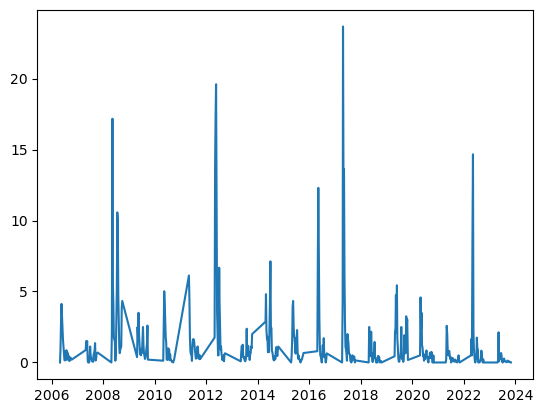

In [54]:
pyplot.plot('datum', 'Mittelwert', data=df_total)

## Model bauen und testen

In [24]:
df_total.shape

(466, 25)

In [26]:
from sklearn.ensemble import RandomForestRegressor
df_total_train = df_total[1:400]
df_total_test = df_total[400:466]
Xtrain = np.array(df_total_train[['tempmax_wohlen','tempmin_wohlen','tempavg_wohlen','rainsum_wohlen','windavg_wohlen','trend','week_x']])
Ytrain = np.array(df_total_train['Mittelwert'])
Xtest = np.array(df_total_test[['tempmax_wohlen','tempmin_wohlen','tempavg_wohlen','rainsum_wohlen','windavg_wohlen','trend','week_x']])
Ytest = np.array(df_total_test['Mittelwert'])
clf = RandomForestRegressor(n_estimators=1000)
clf = clf.fit(Xtrain, Ytrain)

In [45]:
from sklearn.metrics import mean_squared_error, explained_variance_score
Ypredict=clf.predict(Xtest)
df_zz=pd.DataFrame(Ypredict)
df_total_predict=df_total_test.copy()
df_total_predict = pd.concat([df_total_predict, df_zz], ignore_index=True, axis=0)
print(f'Standartfehler: {mean_squared_error(Ytest,Ypredict)}')
print(f'Erklährte Variabilität: {explained_variance_score(Ytest, Ypredict, force_finite=False)}')

Standartfehler: 3.8455315720624097
Erklährte Variabilität: 0.15419823322750892


In [46]:
Ypredict


array([0.35917162, 1.37115133, 1.54747021, 0.77855903, 1.09762784,
       1.46727885, 1.39670283, 1.51465617, 2.50865118, 3.02291432,
       3.88453495, 3.54661153, 2.33462188, 0.70371418, 0.47823662,
       0.55733704, 0.33121755, 0.39123736, 0.37039651, 0.55448407,
       0.41887304, 0.40545729, 0.2413802 , 0.19249819, 0.11893742,
       0.17829262, 0.24173511, 0.19843314, 0.28753812, 0.67086396,
       0.47267521, 0.30305515, 0.55924201, 0.94541918, 0.31957026,
       3.78995324, 1.88570754, 1.40115162, 1.41841121, 2.58367882,
       2.54988739, 2.1213039 , 2.89324193, 2.62271747, 0.96109829,
       1.35847739, 0.59653958, 0.40564582, 0.29341414, 1.21199153,
       0.47927947, 0.6429325 , 0.66153129, 0.25771135, 0.26759894,
       0.16266021, 0.26659878, 0.28372807, 0.803091  , 0.64618159,
       0.49833734, 0.48681448, 0.29659469, 0.16984805, 0.66986653,
       1.79253702])

In [47]:
df_total_predict

,datum,Mittelwert,Median,week_x,year_x,key,temp,rain,key_lag_1week,Datum,...,datetime,week_y,year_y,tempmax_wohlen,tempmin_wohlen,tempavg_wohlen,rainsum_wohlen,windavg_wohlen,trend,0
0,2021-10-04,0.187500,0.0,40.0,2021.0,202140,10.028571,1.942857,202139,2021-10-04,...,2021-10-04,40.0,2021.0,15.257143,8.585714,11.921429,8.0,21.828571,401.0,NaN
1,2021-10-11,0.166667,0.0,41.0,2021.0,202141,7.571429,1.714286,202140,2021-10-11,...,2021-10-11,41.0,2021.0,13.971429,2.300000,8.135714,6.6,12.214286,402.0,NaN
2,2021-10-18,0.500000,0.0,42.0,2021.0,202142,9.785714,0.571429,202141,2021-10-18,...,2021-10-18,42.0,2021.0,15.871429,4.171429,10.021429,5.2,26.200000,403.0,NaN
3,2021-10-25,0.166667,0.0,43.0,2021.0,202143,7.500000,0.214286,202142,2021-10-25,...,2021-10-25,43.0,2021.0,12.971429,4.157143,8.564286,1.2,9.657143,404.0,NaN
4,2021-11-01,0.000000,0.0,44.0,2021.0,202144,5.442857,0.814286,202143,2021-11-01,...,2021-11-01,44.0,2021.0,10.300000,2.485714,6.392857,10.0,20.000000,405.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.486814
128,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.296595
129,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.169848
130,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.669867
